In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
import matplotlib



In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
  df1.shape                         

(13320, 9)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df1["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [8]:
df1["balcony"].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [9]:
df1["bath"].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [10]:
df1["size"].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [11]:
df1["location"].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [12]:
df2 = df1.drop(["availability","society"], axis = 'columns')
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [13]:
df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [14]:
df2.drop(["balcony"], axis = "columns", inplace = True)
df2.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


### since null values are less than 1% of the data we can safely drop them

In [15]:
df3 = df2.dropna()
df3.shape

(13246, 6)

In [16]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df3["bhk"] = df3['size'].apply(lambda x: int(x.split()[0]))
df3["bhk"].unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18016\1516235511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3['size'].apply(lambda x: int(x.split()[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
df3.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df3.drop(["size"], axis = "columns", inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18016\176067529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(["size"], axis = "columns", inplace = True)


In [20]:
df3.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2


In [21]:
import seaborn as sns

In [22]:
pd.crosstab(df3["bath"],df3["bhk"])

bhk,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,19,27,43
bath,,,,,,,,,,,,,,,,,,,
1.0,609,176,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,40,5286,1515,62,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3.0,0,61,2980,199,30,12,2,1,0,0,0,0,0,0,0,0,0,0,0
4.0,0,4,298,779,97,34,8,6,0,0,0,0,0,0,0,0,0,0,0
5.0,0,0,35,267,173,31,13,4,1,0,0,0,0,0,0,0,0,0,0
6.0,0,0,2,84,33,116,16,14,6,0,1,1,0,0,0,0,0,0,0
7.0,0,0,0,1,15,16,50,16,3,1,0,0,0,0,0,0,0,0,0
8.0,0,0,0,2,1,9,5,37,9,1,0,0,0,0,0,0,0,0,0
9.0,0,0,0,0,0,3,5,5,27,2,1,0,0,0,0,0,0,0,0


In [23]:
select_columns = ["bath","bhk","price"]
df_corr = df3[select_columns]
df_corr.corr()

,bath,bhk,price
bath,1.000000,0.898408,0.456350
bhk,0.898408,1.000000,0.397222
price,0.456350,0.397222,1.000000


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='bhk', ylabel='bath'>

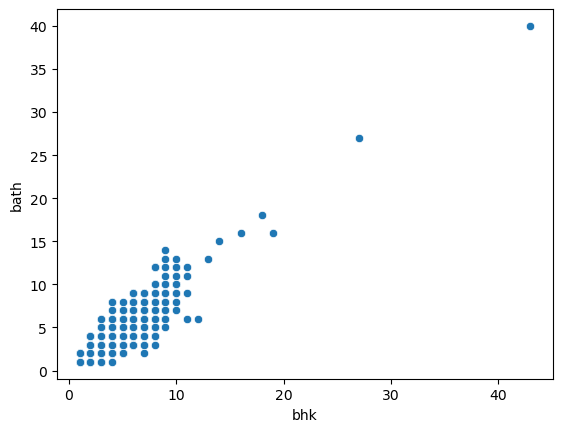

In [24]:
sns.scatterplot(x="bhk", y = "bath", data = df3)

### number of bathrooms and bhk are highly correlated

In [25]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [27]:
df3[df3['total_sqft'].apply(is_float) == False].head(10)

,area_type,location,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [28]:
def convert_to_sqft(x):
    nums = x.split("-")
    if len(nums)==2:
        return ((float(nums[0]) + float(nums[1]))/2)
    try:
        return float(x)
    except:
        return None
    

In [29]:
convert_to_sqft("2100-2850")

2475.0

In [30]:
convert_to_sqft("34.46Sq.meter")

In [31]:
convert_to_sqft("2166")

2166.0

In [32]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_to_sqft)
df4.head(10)

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2
5,Super built-up Area,Whitefield,1170.0,2.0,38.00,2
6,Super built-up Area,Old Airport Road,2732.0,4.0,204.00,4
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,600.00,4
8,Super built-up Area,Marathahalli,1310.0,3.0,63.25,3
9,Plot Area,Gandhi Bazar,1020.0,6.0,370.00,6


In [33]:
df4.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
total_sqft                  2475.0
bath                           4.0
price                        186.0
bhk                              4
Name: 30, dtype: object

In [34]:
df4.loc[410]

area_type     Super built-up  Area
location                   Kengeri
total_sqft                     NaN
bath                           1.0
price                         18.5
bhk                              1
Name: 410, dtype: object

In [35]:
df4.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


In [36]:
df5 = df4.copy()
df5['price_per_sqft'] = df5["price"]*100000/df5["total_sqft"]
df5.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


<Axes: >

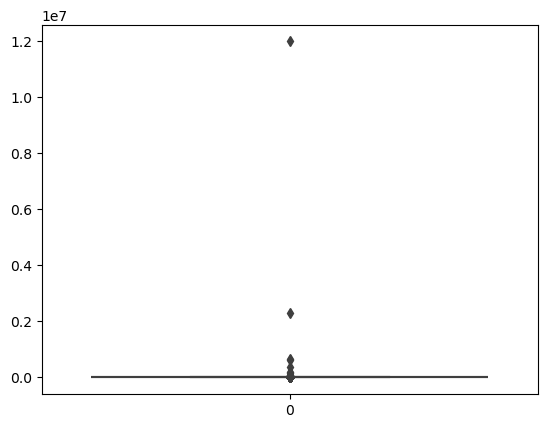

In [37]:
sns.boxplot(df5["price_per_sqft"])

<Axes: >

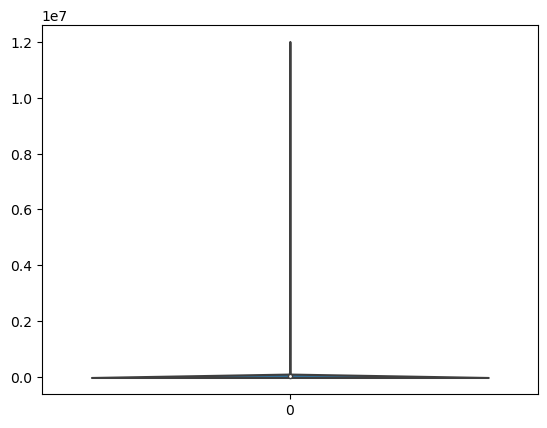

In [38]:
sns.violinplot(df5["price_per_sqft"])

<Axes: >

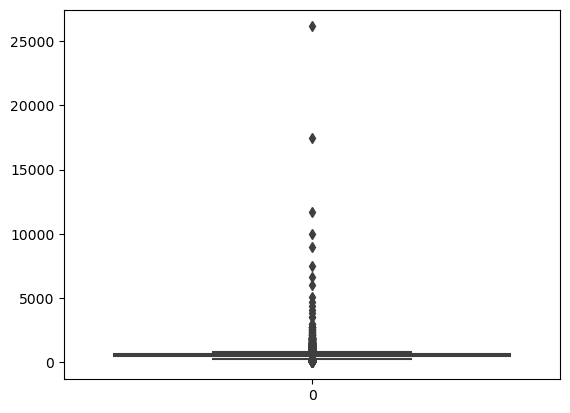

In [39]:
df5["bedroom_area"] = df5["total_sqft"]/df5["bhk"]
sns.boxplot(df5["bedroom_area"])

### As we can see there are some outliers

In [40]:
len(df5.location.unique())

1304

### too many to do one-hot encoding

In [41]:
df5.location = df5.location.apply(lambda x: x.strip()) # to remove extra spaces
location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [42]:
location_stats[location_stats <= 10]

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [43]:
less_than_10_location = location_stats[location_stats <= 10]
less_than_10_location 

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [44]:
len(df5.location.unique())

1293

In [45]:
df5.location = df5.location.apply(lambda x: "other" if x in less_than_10_location else x)

In [46]:
len(df5.location.unique())

242

In [47]:
df5.head(15)

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft,bedroom_area
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,528.000000
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615,650.000000
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,480.000000
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,507.000000
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000,600.000000
5,Super built-up Area,Whitefield,1170.0,2.0,38.00,2,3247.863248,585.000000
6,Super built-up Area,Old Airport Road,2732.0,4.0,204.00,4,7467.057101,683.000000
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182,825.000000
8,Super built-up Area,Marathahalli,1310.0,3.0,63.25,3,4828.244275,436.666667
9,Plot Area,other,1020.0,6.0,370.00,6,36274.509804,170.000000


## outlier removal

In [48]:
df5.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [49]:
df5.bedroom_area.describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
Name: bedroom_area, dtype: float64

### lets say the least typical bedroom area is around 300 but as we can see that these houses usually are more costly

In [50]:
df5[df5.bedroom_area < 300].count()

area_type         744
location          744
total_sqft        744
bath              744
price             744
bhk               744
price_per_sqft    744
bedroom_area      744
dtype: int64

In [51]:
len(df5[(df5['bedroom_area'] < 300)])

744

In [52]:
df5.shape

(13246, 8)

In [53]:
df6 = df5[~((df5['bedroom_area'] < 300))]
df6.shape

(12502, 8)

In [54]:
df7 = df6[~(df6['bedroom_area'] < 200)]
df7.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft,bedroom_area
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,528.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615,650.0
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,480.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,507.0
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000,600.0


In [55]:
df7.shape

(12502, 8)

In [56]:
df7.bedroom_area.describe()

count    12456.000000
mean       596.635185
std        387.540157
min        300.000000
25%        491.916667
50%        562.500000
75%        630.000000
max      26136.000000
Name: bedroom_area, dtype: float64

In [57]:
def remove_pps_outlier(df, group):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby(group):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft < (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [58]:
df8 = remove_pps_outlier(df6, "location")
df8.shape

(10241, 8)

In [59]:
df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(10147, 8)

Text(0, 0.5, 'count')

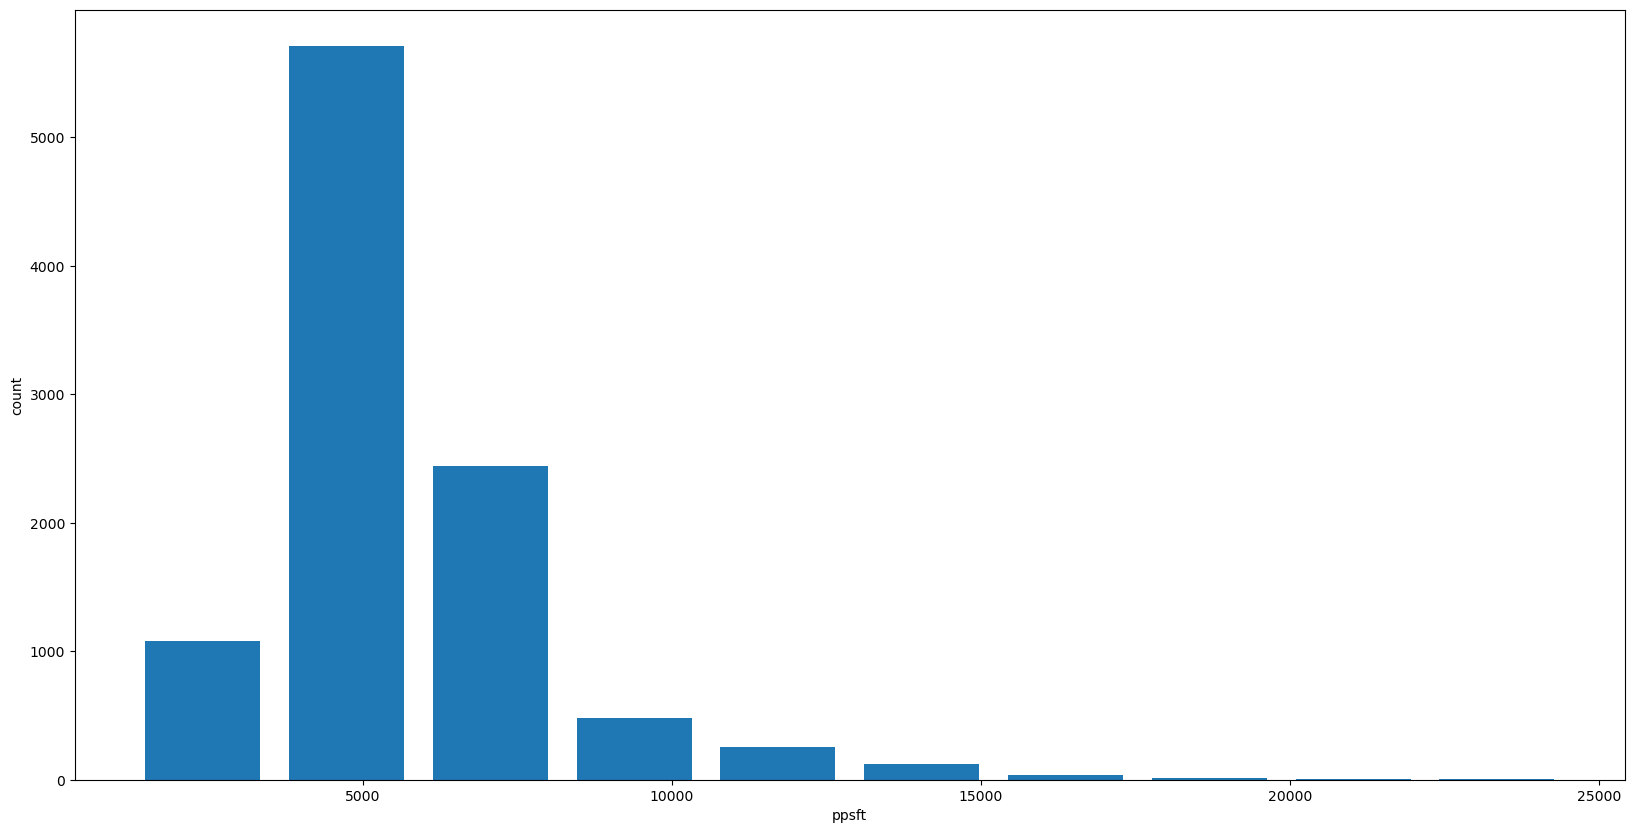

In [60]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_per_sqft, rwidth =0.8)
plt.xlabel("ppsft")
plt.ylabel("count")

Text(0, 0.5, 'count')

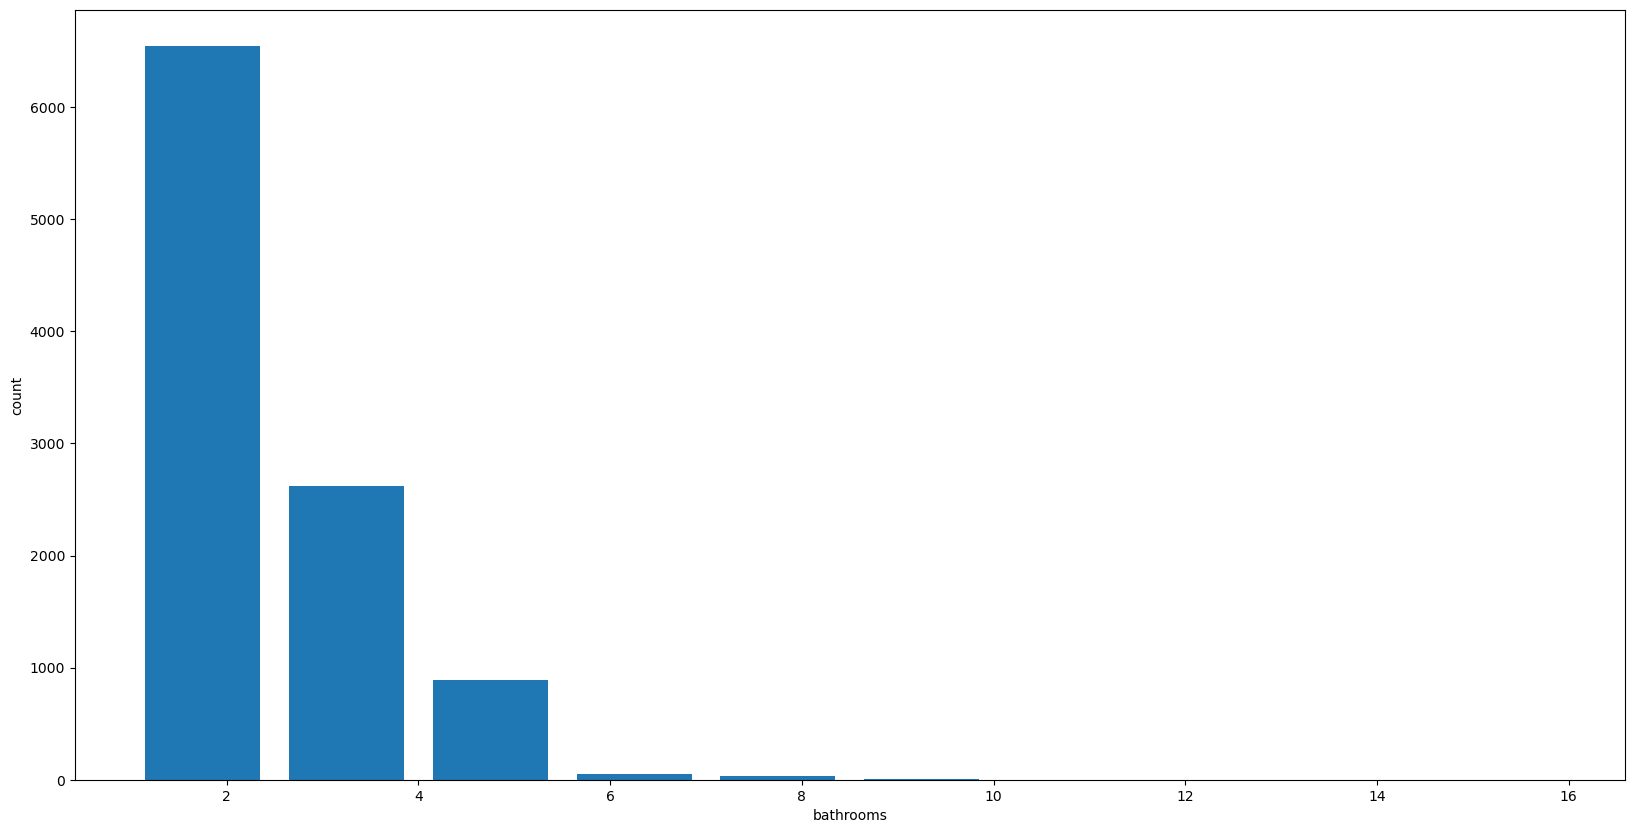

In [61]:
plt.hist(df9.bath, rwidth =0.8)
plt.xlabel("bathrooms")
plt.ylabel("count")

In [62]:
df10 = df9.drop(["price_per_sqft","area_type","bedroom_area"], axis = 1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [63]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
dummies_int = dummies.astype(int)
dummies_int

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
df11 = pd.concat([dummies_int.drop('other', axis='columns'), df10], axis="columns")
df11.head()
# we can live woth one less because it can be represented by 0 in all other

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,location,total_sqft,bath,price,bhk
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1st Block Jayanagar,1235.0,2.0,148.0,2


In [66]:
df11.drop("location", axis="columns", inplace = True)
df11.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,total_sqft,bath,price,bhk
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2850.0,4.0,428.0,4
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1630.0,3.0,194.0,3
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1875.0,2.0,235.0,3
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1200.0,2.0,130.0,3
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1235.0,2.0,148.0,2


### model building take -1

In [67]:
df11.shape

(10147, 245)

In [68]:
x = df11.drop('price', axis = "columns")
x.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,total_sqft,bath,bhk
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2850.0,4.0,4
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1630.0,3.0,3
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1875.0,2.0,3


In [69]:
y = df11.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [71]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [72]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.791947733758823

In [73]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), x, y, cv  = cv)

array([0.81155684, 0.77261421, 0.80214981, 0.80426801, 0.79827292])

In [74]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, max_depth = 4)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.6425029788243493

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)
gb_model.score(X_test, y_test)

0.653881988370411

### model building take-2 / more outlier removal

In [76]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


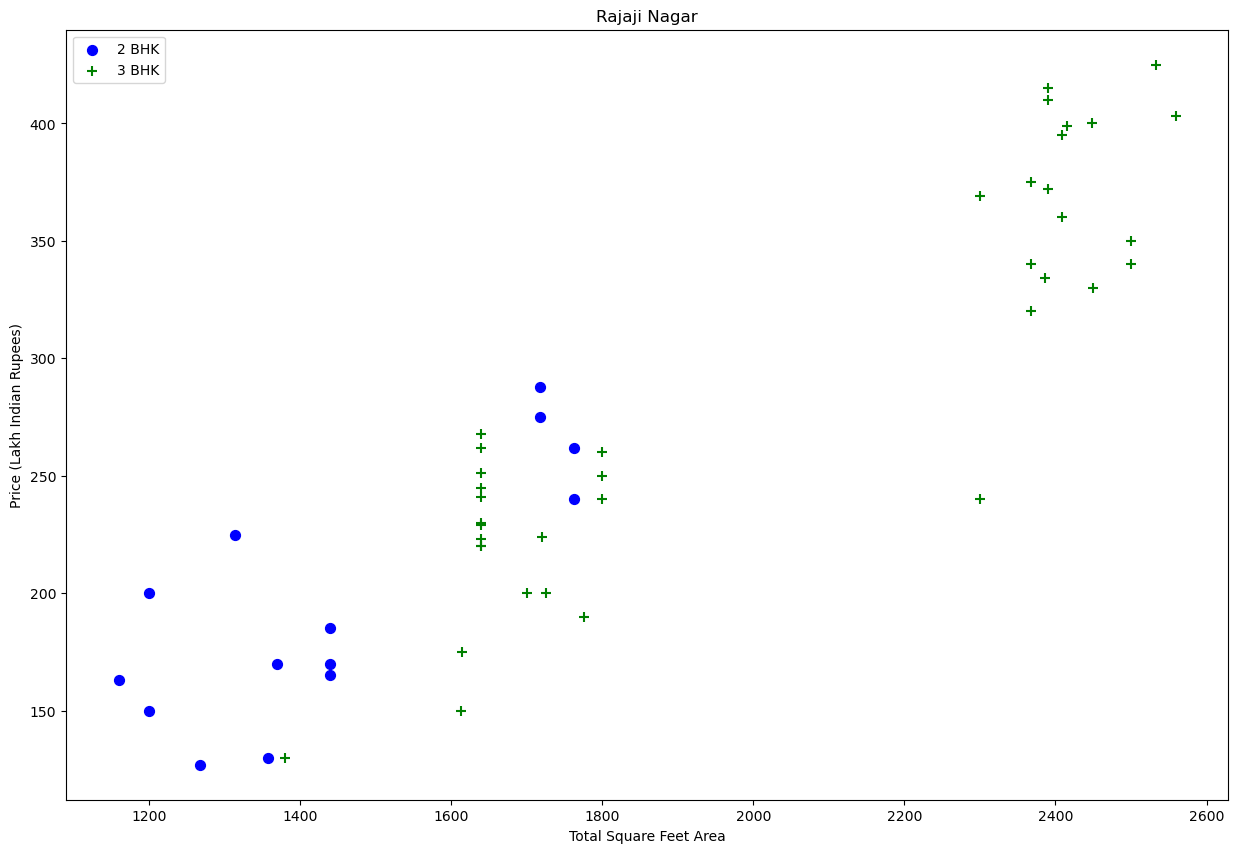

In [77]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df10,"Rajaji Nagar")

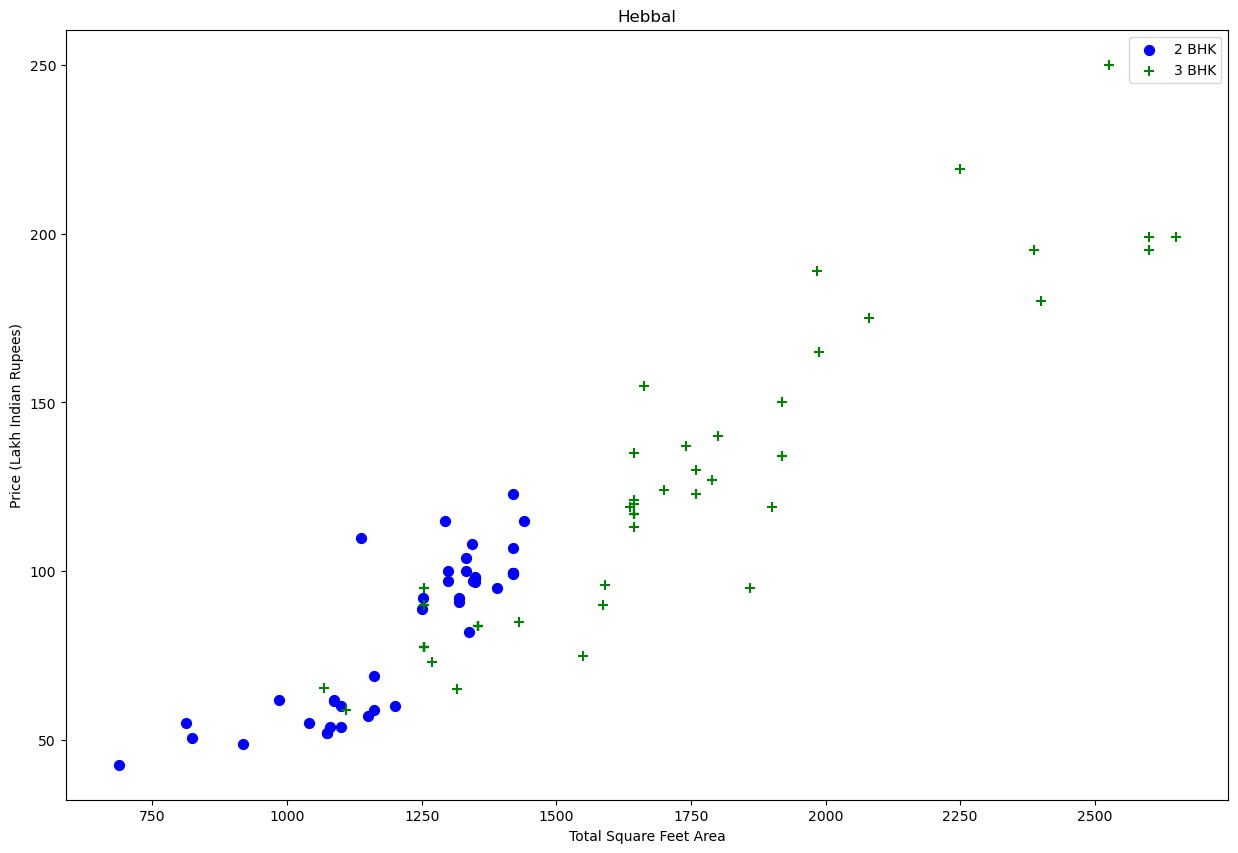

In [78]:
plot_scatter_chart(df10, "Hebbal")

### we can see that there are somme properties that have more price for 3bhk less than 2bhk apartment having the same total area

In [79]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df12 = remove_bhk_outliers(df9)
# df8 = df7.copy()
df12.shape

(7254, 8)

In [80]:
df12.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft,bedroom_area
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,712.500000
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,543.333333
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,625.000000
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,400.000000
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,617.500000


In [81]:
df12.drop(["area_type","price_per_sqft","bedroom_area"], axis = "columns", inplace = True)
df12.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


###  model buiding

In [82]:
dummies_1 = pd.get_dummies(df12.location)
dummies_1 = dummies_1.astype(int)
dummies_1.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
dummies_1 = pd.concat([df12, dummies_1], axis = "columns")
dummies_1.drop("location", axis = "columns", inplace = True)
dummies_1.head()


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X2 = dummies_1.drop("price", axis = "columns")
y2 = dummies_1.price
X2.shape

(7254, 245)

In [85]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 10)


### linear Regression

In [86]:
lr_reg = LinearRegression()
lr_reg.fit(X2_train, y2_train)
lr_reg.score(X2_test, y2_test)

0.8206812865464632

In [87]:
cross_val_score(LinearRegression(), X2, y2, cv=cv)

array([0.82455835, 0.78753004, 0.85038844, 0.869384  , 0.85543956])

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
y_pred_lr = lr_reg.predict(X2_test)
np.sqrt(mean_squared_error(y_pred_lr, y2_test))

29.779728156701474

### Random Forest Regressor

In [1]:
forest2 = RandomForestRegressor(n_estimators = 1000, max_depth = 5)
forest2.fit(X2_train, y2_train)
forest2.score(X2_test, y2_test)

NameError: name 'RandomForestRegressor' is not defined

In [91]:
y_pred_forest = forest2.predict(X2_test)
np.sqrt(mean_squared_error(y_pred_forest, y2_test))

34.02237493091222

In [92]:
cross_val_score(RandomForestRegressor(), X2, y2, cv=cv)

array([0.85244566, 0.69753433, 0.8652157 , 0.89727682, 0.85314809])

In [93]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the model
rf = RandomForestRegressor()

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X2, y2)

# Get the best estimator (model) and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5}
Best Model: RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)


In [94]:
best_model.score(X2_test, y2_test)

0.7855060978255886

In [95]:
best_forest_pred = best_model.predict(X2_test)
np.sqrt(mean_squared_error(best_forest_pred, y2_test))

32.569822889349894